In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import roc_curve, roc_auc_score

In [5]:
car_sales = pd.read_csv('Data/7.1 car-sales.csv')
car_sales.shape

(10, 5)

In [6]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [8]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
# Car-Sales to predicts price
x = car_sales.drop('Price', axis=1)
y = car_sales['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

reg = RandomForestRegressor().fit(x_train, y_train)
reg.score(x_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [10]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [11]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

features = ['Make', 'Colour']
label = ['Price']
one_hot = OneHotEncoder()

transform = ColumnTransformer([('one_hot', one_hot, features),
                               ('label', one_hot, label)], remainder='passthrough')
transformed_x = transform.fit_transform(x)


ValueError: A given column is not a column of the dataframe

In [19]:
transformed_x.dtype

dtype('float64')

In [25]:
type(x), type(y), x.dtypes, y.dtypes

(pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 Make             object
 Colour           object
 Odometer (KM)     int64
 Doors             int64
 dtype: object,
 dtype('O'))

In [20]:
# creating test and train again
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

reg = RandomForestRegressor().fit(x_train, y_train)
reg.score(x_test, y_test)

ValueError: could not convert string to float: '$7,000.00'

In [27]:
# getting back all our data
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [28]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [32]:
# convert these object into integers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

features = ['Make', 'Colour', 'Price']
one_hot = OneHotEncoder()

transformer = ColumnTransformer([('one_hot', one_hot, features)], remainder = 'passthrough')
transformed_car_sales = transformer.fit_transform(car_sales)

transformed_car_sales

<10x20 sparse matrix of type '<class 'numpy.float64'>'
	with 50 stored elements in Compressed Sparse Row format>

In [34]:
car_sales_df = pd.DataFrame(transformed_car_sales, columns=car_sales.columns)

ValueError: Shape of passed values is (10, 1), indices imply (10, 5)

In [35]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [36]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [39]:
car_sales['Price'] = car_sales['Price'].astype('float')

ValueError: could not convert string to float: '$4,000.00'

# Let's play with Classification model and Evaluate it


In [45]:
heart_disease = pd.read_csv('Data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [46]:
heart_disease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [47]:
len(heart_disease)

303

In [48]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [49]:
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf = RandomForestClassifier().fit(x_train, y_train)
clf.score(x_test, y_test)

0.7213114754098361

In [51]:
y_preds = clf.predict(x_test)
y_preds

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [53]:
np.array(y_preds)

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [55]:
# checking model probabilities
y_probs = clf.predict_proba(x_test)
y_probs[: 5]

array([[0.85, 0.15],
       [0.41, 0.59],
       [0.02, 0.98],
       [0.08, 0.92],
       [0.04, 0.96]])

## Evaluation
### 1. Cross_val_score
### 2. roc_curve
### 3. confusion_metrix

In [58]:
# Cross_vel_score

cross_val_score(clf, x, y, cv=3)

array([0.85148515, 0.83168317, 0.77227723])

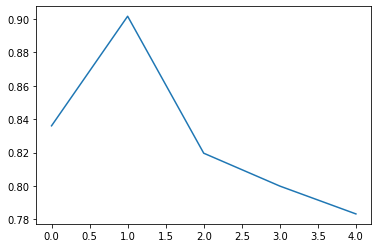

In [61]:
# plot this
plt.plot(cross_val_score(clf, x, y));

In [64]:
y_probs_positive = y_probs[: ,1]

In [65]:
# roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

In [66]:
fpr, tpr


(array([0.        , 0.        , 0.        , 0.07142857, 0.07142857,
        0.10714286, 0.10714286, 0.10714286, 0.10714286, 0.14285714,
        0.14285714, 0.17857143, 0.17857143, 0.25      , 0.25      ,
        0.25      , 0.28571429, 0.28571429, 0.35714286, 0.35714286,
        0.39285714, 0.39285714, 0.46428571, 0.53571429, 0.75      ,
        0.82142857, 0.89285714, 1.        ]),
 array([0.        , 0.06060606, 0.3030303 , 0.36363636, 0.39393939,
        0.39393939, 0.51515152, 0.57575758, 0.63636364, 0.63636364,
        0.66666667, 0.66666667, 0.6969697 , 0.6969697 , 0.75757576,
        0.78787879, 0.81818182, 0.93939394, 0.93939394, 0.96969697,
        0.96969697, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ]))

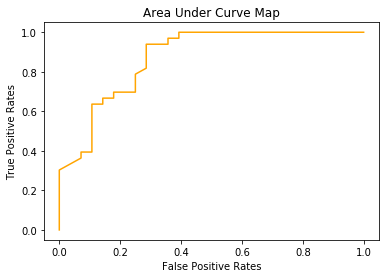

In [69]:
plt.plot(fpr, tpr, color='Orange');
plt.title('Area Under Curve Map')
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')
plt.show();

In [70]:
# checking area under curve score
roc_auc_score(y_test, y_probs_positive)

0.8717532467532467

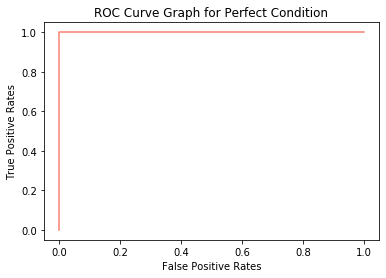

In [71]:
# what could be the perfect AUC or ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)

plt.plot(fpr, tpr, color='Salmon')
plt.title('ROC Curve Graph for Perfect Condition')
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')
plt.show();

In [72]:
roc_auc_score(y_test, y_test)

1.0

In [73]:
# Confusion Metrix

In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
import seaborn as sns

In [81]:
cnf_met = confusion_matrix(y_test, y_preds)

In [83]:
cnf_met

array([[21,  7],
       [10, 23]], dtype=int64)

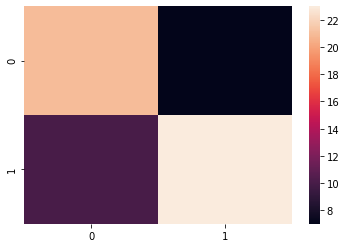

In [84]:
sns.heatmap(cnf_met)

In [85]:
cnf_met, pd.crosstab(y_test, y_preds)

(array([[21,  7],
        [10, 23]], dtype=int64),
 col_0    0   1
 target        
 0       21   7
 1       10  23)

In [86]:
cnf_met

array([[21,  7],
       [10, 23]], dtype=int64)

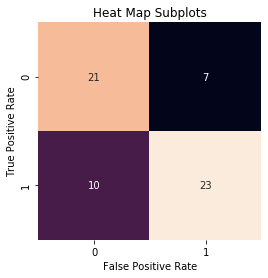

In [98]:
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.heatmap(cnf_met,
                 annot=True,
                 cbar=False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Heat Map Subplots')
plt.show();

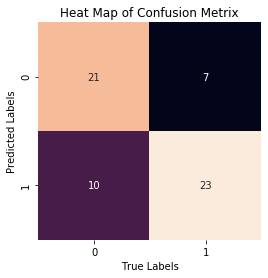

In [99]:
# let's create a function for this

def conf_met_plot(confusion_metrix):
    fig, ax = plt.subplots(figsize=(4, 4))
    ax = sns.heatmap(confusion_metrix,
                     annot=True,
                     cbar=False)
    ax.set(title='Heat Map of Confusion Metrix',
           xlabel='True Labels',
           ylabel='Predicted Labels')

conf_met_plot(cnf_met)

In [101]:
np.array(y_test), y_preds

(array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0], dtype=int64),
 array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64))

In [103]:
# Checking for the True Positives and False Positives
y_probs[:12]

array([[0.85, 0.15],
       [0.41, 0.59],
       [0.02, 0.98],
       [0.08, 0.92],
       [0.04, 0.96],
       [0.11, 0.89],
       [0.52, 0.48],
       [0.27, 0.73],
       [0.17, 0.83],
       [0.06, 0.94],
       [0.49, 0.51],
       [0.86, 0.14]])

In [104]:
clf.score(x_test, y_test)

0.7213114754098361

In [108]:
clf.score(x_test, y_test)

0.7213114754098361

In [113]:
pd.crosstab(y_test, y_preds)

col_0,0,1
target,,
0,21,7
1,10,23


In [115]:
cross_val_score(clf, x, y)

array([0.85245902, 0.90163934, 0.80327869, 0.83333333, 0.76666667])